# Lab1


In [1]:
import numpy as np
import maze as mz

## Problem 1: The Maze and the Random Minotaur

### MDP1

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

#mz.draw_maze(maze)

### Dynamic Programming 

#### Minotaur can't stay 

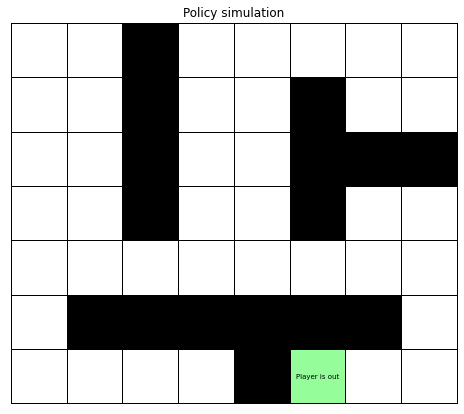

In [7]:
# Create an environment maze
env = mz.Maze(maze, stay = False)

# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon)

# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0, 6,5)
path, win = env.simulate(start, policy, method);

# Show the shortest path 
mz.animate_solution(maze, path)

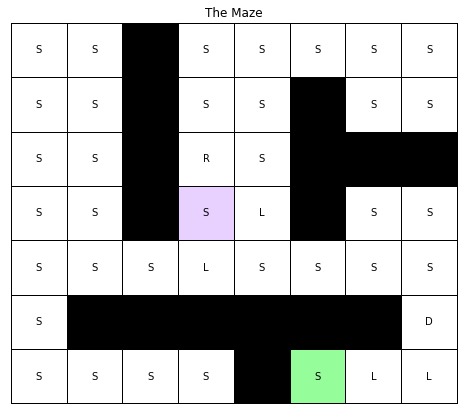

In [8]:
#Plot policy at specific time with minotaur at specific location
#S: Stay, L: Left, R: Right, U: Up, D: down
#Green -> objective, Purple -> minotaur
minotaur_position = (3,3)
env.draw_policy(policy, 17, minotaur_position)

horizon  0
horizon  1
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at

YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at

YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at

YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at

YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at

YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at

YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at

YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at

YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at

YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at

YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at

YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at

YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at

YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at

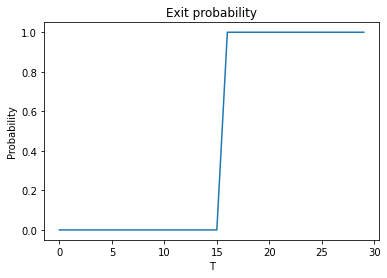

In [9]:
#Plot graph with probability of exiting the maze
mz.exit_probability(env,method)

#### Minotaur is allowed to stay 

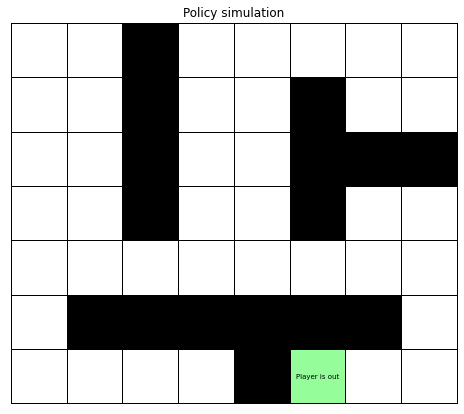

In [10]:
# Create an environment maze
env = mz.Maze(maze, stay = True)

# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon)

# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0, 6,5)
path, win = env.simulate(start, policy, method);

# Show the shortest path 
mz.animate_solution(maze, path)

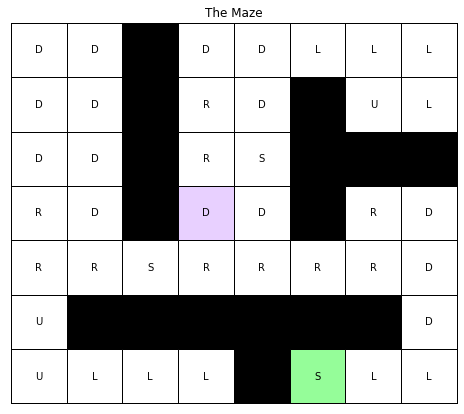

In [12]:
#Plot policy at specifict time with minotaur at specific location
#S: Stay, L: Left, R: Right, U: Up, D: down
#Green -> objective, Purple -> minotaur
minotaur_position = (3,3)
env.draw_policy(policy, 4, minotaur_position)

horizon  0
horizon  1
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YO

YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  16
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  16
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  16
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  16
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  16
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  16
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  15
YOU WON at tim

YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  17
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  16
YOU'RE DEAD
YOU WON at time =  16
YOU'RE DEAD
YOU WON at time =  17
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  16
YOU WON at time =  16
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  16
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  16
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  16
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  16
YOU'RE DEAD
YOU WON at time =  17
YOU'RE DEAD
YOU'

YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  16
YOU WON at time =  15
YOU WON at time =  18
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  18
YOU WON at time =  16
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  16
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  16
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  18
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  16
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  17
YOU WON at time =  17
YOU WON at time =  15
YOU WON at time =  17
YOU WON at time =  16
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  18
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  18
YOU'RE DEAD
YOU'RE DEAD
YOU WON at

YOU WON at time =  17
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  17
YOU WON at time =  18
YOU'RE DEAD
YOU WON at time =  19
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  19
YOU'RE DEAD
YOU WON at time =  19
YOU'RE DEAD
YOU WON at time =  16
YOU WON at time =  16
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  16
YOU WON at time =  17
YOU WON at time =  19
YOU WON at time =  18
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  18
YOU WON at time =  18
YOU WON at time =  17
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  16
YOU WON at time =  18
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  18
YOU WON at time =  16
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  17
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  17
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  16
YOU WON at time =  16
YOU 

YOU'RE DEAD
YOU WON at time =  16
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  16
YOU WON at time =  17
YOU'RE DEAD
YOU WON at time =  16
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  16
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  17
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  18
YOU WON at time =  17
YOU WON at time =  17
YOU WON at time =  17
YOU'RE DEAD
YOU WON at time =  20
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  16
YOU WON at time =  17
YOU WON at time =  16
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  17
YOU WON at time =  15
YOU WON at time =  16
YOU WON at time =  18
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  18
YOU'RE DEAD
YOU WON at time =  19
YOU WON at time =  15
YOU WON at time =  17
YOU WON at time =  18
YOU WON at time =  16


YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  18
YOU WON at time =  15
YOU WON at time =  16
YOU'RE DEAD
YOU WON at time =  16
YOU WON at time =  15
YOU WON at time =  21
YOU WON at time =  16
YOU'RE DEAD
YOU WON at time =  17
YOU WON at time =  20
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  17
YOU'RE DEAD
YOU WON at time =  21
YOU WON at time =  15
YOU WON at time =  19
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  19
YOU'RE DEAD
YOU WON at time =  17
YOU WON at time =  19
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  20
YOU WON at time =  15
YOU WON at time =  17
YOU'RE DEAD
YOU WON at time =  16
YOU WON at time =  21
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  16
YOU WON at time =  15
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  15
YOU WON 

YOU WON at time =  20
YOU WON at time =  18
YOU WON at time =  19
YOU WON at time =  16
YOU'RE DEAD
YOU WON at time =  16
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  22
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  21
YOU'RE DEAD
YOU WON at time =  16
YOU'RE DEAD
YOU WON at time =  18
YOU WON at time =  16
YOU WON at time =  15
YOU WON at time =  16
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  17
YOU WON at time =  15
YOU WON at time =  17
YOU WON at time =  19
YOU'RE DEAD
YOU WON at time =  20
YOU'RE DEAD
YOU WON at time =  20
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  18
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  22
YOU WON at time =  17
YOU WON at time =  21
YO

YOU WON at time =  17
YOU'RE DEAD
YOU WON at time =  16
YOU WON at time =  15
YOU WON at time =  16
YOU WON at time =  18
YOU WON at time =  17
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  20
YOU WON at time =  15
YOU WON at time =  19
YOU WON at time =  18
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  20
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  21
YOU WON at time =  23
YOU WON at time =  17
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  16
YOU WON at time =  16
YOU WON at time =  21
YOU WON at time =  15
YOU WON at time =  16
YOU WON at time =  23
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  16
YOU WON at time =  16
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  20
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  16
YOU WON at time =  15
YOU WON at time =  1

YOU WON at time =  17
YOU WON at time =  15
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  19
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  18
YOU'RE DEAD
YOU WON at time =  19
YOU WON at time =  22
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  18
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  17
YOU WON at time =  22
YOU WON at time =  17
YOU WON at time =  17
YOU'RE DEAD
YOU WON at time =  22
YOU WON at time =  22
YOU WON at time =  23
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  17
YOU WON at time =  21
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  16
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  20
YOU WON at time =  21
YOU WON at time =  23
YOU WON at time =  20
YOU WON at time =  16
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  17
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  17
YOU WON at time =  17


YOU WON at time =  20
YOU WON at time =  20
YOU WON at time =  15
YOU WON at time =  19
YOU WON at time =  15
YOU WON at time =  19
YOU'RE DEAD
YOU WON at time =  25
YOU WON at time =  17
YOU WON at time =  15
YOU WON at time =  24
YOU WON at time =  15
YOU'RE DEAD
YOU'RE DEAD
YOU'RE DEAD
YOU WON at time =  21
YOU WON at time =  20
YOU'RE DEAD
YOU WON at time =  16
YOU WON at time =  15
YOU WON at time =  17
YOU WON at time =  18
YOU WON at time =  23
YOU WON at time =  17
YOU'RE DEAD
YOU WON at time =  21
YOU WON at time =  19
YOU WON at time =  17
YOU WON at time =  22
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  20
YOU WON at time =  25
YOU WON at time =  16
YOU WON at time =  23
YOU WON at time =  15
YOU WON at time =  16
YOU WON at time =  15
YOU WON at time =  19
YOU WON at time =  24
YOU WON at time =  19
YOU WON at time =  15
YOU WON at time =  23
YOU WON at time =  18
YOU WON at time =  15
YOU WON at time =  16
YOU WON at time =  15
YOU WON at time =  20
YOU'

YOU WON at time =  17
YOU WON at time =  20
YOU WON at time =  25
YOU WON at time =  16
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  20
YOU WON at time =  20
YOU WON at time =  22
YOU WON at time =  16
YOU WON at time =  18
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  16
YOU WON at time =  21
YOU WON at time =  19
YOU WON at time =  15
YOU WON at time =  20
YOU WON at time =  16
YOU WON at time =  16
YOU WON at time =  15
YOU WON at time =  24
YOU WON at time =  15
YOU WON at time =  22
YOU WON at time =  15
YOU WON at time =  16
YOU WON at time =  21
YOU WON at time =  25
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  22
YOU WON at time =  19
YOU WON at time =  17
YOU WON at time =  26
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  25
YOU WON at time =  15
YOU WON at time =  26
YOU WON at time =  15
YOU WON at time =  17
YOU WON at time =  19
YOU WON at time =  19
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time 

YOU WON at time =  16
YOU WON at time =  21
YOU WON at time =  21
YOU WON at time =  23
YOU WON at time =  15
YOU WON at time =  16
YOU WON at time =  19
YOU WON at time =  17
YOU'RE DEAD
YOU WON at time =  18
YOU WON at time =  24
YOU WON at time =  18
YOU'RE DEAD
YOU WON at time =  17
YOU WON at time =  24
YOU WON at time =  26
YOU WON at time =  16
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  16
YOU WON at time =  16
YOU WON at time =  16
YOU WON at time =  24
YOU WON at time =  15
YOU WON at time =  22
YOU WON at time =  25
YOU WON at time =  26
YOU'RE DEAD
YOU WON at time =  23
YOU WON at time =  25
YOU WON at time =  16
YOU WON at time =  15
YOU WON at time =  26
YOU WON at time =  19
YOU WON at time =  24
YOU WON at time =  21
YOU'RE DEAD
YOU WON at time =  15
YOU'RE DEAD
YOU WON at time =  16
YOU WON at time =  22
YOU WON at time =  15
YOU WON at time =  18
YOU WON at time =  18
YOU WON at time =  18
YOU WON at time =  20
YOU 

YOU WON at time =  25
YOU WON at time =  20
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  26
YOU WON at time =  19
YOU WON at time =  28
YOU WON at time =  25
YOU'RE DEAD
YOU WON at time =  15
YOU WON at time =  18
YOU'RE DEAD
YOU WON at time =  18
YOU'RE DEAD
YOU WON at time =  25
YOU'RE DEAD
YOU WON at time =  19
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  19
YOU WON at time =  17
YOU WON at time =  15
YOU WON at time =  19
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  24
YOU WON at time =  19
YOU WON at time =  16
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  19
YOU WON at time =  15
YOU WON at time =  16
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  19
YOU WON at time =  15
YOU WON at time =  26
YOU WON at time =  23
YOU WON at time =  15
YOU WON at time =  21
YOU'RE DEAD
YOU WON at time =  21
YOU WON at time =  19
YOU WON at time =  24
YOU WON at time =  18
YOU WON at time =  25
YOU WON at time 

YOU WON at time =  16
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  16
YOU WON at time =  16
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  24
YOU WON at time =  18
YOU WON at time =  17
YOU WON at time =  16
YOU WON at time =  18
YOU WON at time =  15
YOU WON at time =  23
YOU WON at time =  16
YOU WON at time =  17
YOU WON at time =  26
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  19
YOU'RE DEAD
YOU WON at time =  16
YOU WON at time =  16
YOU WON at time =  21
YOU WON at time =  25
YOU WON at time =  19
YOU WON at time =  15
YOU WON at time =  19
YOU WON at time =  28
YOU WON at time =  15
YOU WON at time =  17
YOU WON at time =  24
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  15
YOU WON at time =  20
YOU WON at time =  17
YOU WON at time =  21
YOU WON at time =  22
YOU WON at time =  15
YOU WON at time =  19
YOU WON at time =  15
YOU WON at time =  16
YOU WON at time =  17
YOU WON at time =  21
YOU WON at time =  2

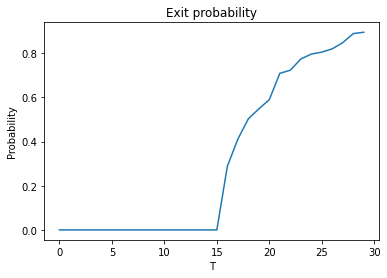

In [13]:
#Plot graph with probability of exiting the maze
mz.exit_probability(env,method)

### Value Iteration

#### Minotaur can't stay 

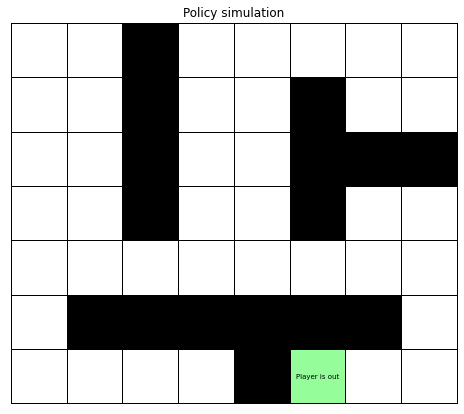

In [14]:
# Create an environment maze
env = mz.Maze(maze, stay = False)

# Infinite horizon
# Discount Factor 
gamma   = 29/30 # E[T] = 30 = 1/(1-gamma)
# Accuracy treshold 
epsilon = 0.0001;
V, policy = mz.value_iteration(env, gamma, epsilon)

# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0, 6,5)
path, win = env.simulate(start, policy, method);

# Show the shortest path 
mz.animate_solution(maze, path)

In [15]:
#Plot graph with probability of exiting the maze
mz.exit_probability(env,method)

Venom will kill you at time  49
YOU WON at time =  16
Venom will kill you at time  41
YOU WON at time =  16
Venom will kill you at time  20
YOU WON at time =  16
Venom will kill you at time  54
YOU WON at time =  16
Venom will kill you at time  50
YOU WON at time =  16
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  19
YOU WON at time =  16
Venom will kill you at time  24
YOU WON at time =  16
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  36
YOU WON at time =  16
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  83
YOU WON at time =  16
Venom will kill you at time  18
YOU WON at time =  16
Venom will kill you at time  45
YOU WON at time =  16
Venom will kill you at time  92
YOU WON at time =  16
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  36
YOU WON at time =  16
Venom will kill you at time  41
YOU WON at time =  16
Venom 

Venom will kill you at time  162
YOU WON at time =  16
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  28
YOU WON at time =  16
Venom will kill you at time  107
YOU WON at time =  16
Venom will kill you at time  40
YOU WON at time =  16
Venom will kill you at time  58
YOU WON at time =  16
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  36
YOU WON at time =  16
Venom will kill you at time  99
YOU WON at time =  16
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  31
YOU WON at time =  16
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  27
YOU WON at time =  16
Venom will kill you at time  86
YOU WON at time =  16
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  84
YOU WON at time =  16
Ven

Venom will kill you at time  19
YOU WON at time =  16
Venom will kill you at time  18
YOU WON at time =  16
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  26
YOU WON at time =  16
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  57
YOU WON at time =  16
Venom will kill you at time  50
YOU WON at time =  16
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  39
YOU WON at time =  16
Venom will kill you at time  25
YOU WON at time =  16
Venom will kill you at time  9
YOU'RE 

YOU'RE DEAD
Venom will kill you at time  45
YOU WON at time =  16
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  30
YOU WON at time =  16
Venom will kill you at time  28
YOU WON at time =  16
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  53
YOU WON at time =  16
Venom will kill you at time  20
YOU WON at time =  16
Venom will kill you at time  95
YOU WON at time =  16
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  79
YOU WON at time =  16
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  50
YOU WON at time =  16
Venom will kill you at time  27
YOU WON at time =  16
Venom will kill you at time  87
YOU WON at time =  16
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  24
YOU WON at time =  16
Venom will kill you at time  29
YOU WON at time =  16
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  18
YOU 

Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  20
YOU WON at time =  16
Venom will kill you at time  27
YOU WON at time =  16
Venom will kill you at time  69
YOU WON at time =  16
Venom will kill you at time  20
YOU WON at time =  16
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time  20
YOU WON at time =  16
Venom will kill you at time  56
YOU WON at time =  16
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time  27
YOU WON at time =  16
Venom will kill you at time  16
YOU'RE DEAD
Venom will kill you at time  22
YOU WON at time =  16
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  26
YOU WON at time =  16
Venom will kill you at time  57
YOU WON 

Venom will kill you at time  68
YOU WON at time =  16
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  20
YOU WON at time =  16
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  33
YOU WON at time =  16
Venom will kill you at time  23
YOU WON at time =  16
Venom will kill you at time  39
YOU WON at time =  16
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  23
YOU WON at time =  16
Venom will kill you at time  69
YOU WON at time =  16
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  25
YOU WON at time =  16
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  97
YOU WON at time =  16
Venom will kill you at time  82
YOU WON at time =  16
Venom will kill you at time

YOU'RE DEAD
Venom will kill you at time  37
YOU WON at time =  16
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  96
YOU WON at time =  16
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  120
YOU WON at time =  16
Venom will kill you at time  46
YOU WON at time =  16
Venom will kill you at time  37
YOU WON at time =  16
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  26
YOU WON at time =  16
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  20
YOU WON at time =  16
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  18
YOU WON at time =  16
Venom will kill you at time  37
YOU WON at time =  16
Venom will kill you at time  60
YOU WON at time =  16
Venom will kill you at time  33
YOU WON at time =  16
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  59
YOU WON at time =

YOU WON at time =  16
Venom will kill you at time  96
YOU WON at time =  16
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  26
YOU WON at time =  16
Venom will kill you at time  40
YOU WON at time =  16
Venom will kill you at time  52
YOU WON at time =  16
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  19
YOU WON at time =  16
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  18
YOU WON at time =  16
Venom will kill you at time  18
YOU WON at time =  16
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  45
YOU WON at time =  16
Venom will kill you at time  45
YOU WON at time =  16
Venom will kill you at time  28
YOU WON at time =  16
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time 

YOU WON at time =  16
Venom will kill you at time  18
YOU WON at time =  16
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  26
YOU WON at time =  16
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  73
YOU WON at time =  16
Venom will kill you at time  60
YOU WON at time =  16
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  152
YOU WON at time =  16
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  106
YOU WON at time =  16
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  33
YOU WON at time =  16
Venom will kill you at time  33
YOU WON at time =  16
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  34
YOU WON at time =  16
Venom will kill you at time  29
YOU WON at time 

Venom will kill you at time  56
YOU WON at time =  16
Venom will kill you at time  23
YOU WON at time =  16
Venom will kill you at time  57
YOU WON at time =  16
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  58
YOU WON at time =  16
Venom will kill you at time  56
YOU WON at time =  16
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  42
YOU WON at time =  16
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  19
YOU WON at time =  16
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  33
YOU WON at time =  16
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  54
YOU WON at time =  16
Venom will kill you at time  39
YOU WON at time =  16
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  46
YOU WON at time =

YOU WON at time =  16
Venom will kill you at time  33
YOU WON at time =  16
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  18
YOU WON at time =  16
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time  68
YOU WON at time =  16
Venom will kill you at time  22
YOU WON at time =  16
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  52
YOU WON at time =  16
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  58
YOU WON at time =  16
Venom will kill you at time  55
YOU WON at time =  16
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  16
YOU'RE DEAD
Venom will kill you at time  28
YOU WON at time =  16
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  28
YOU WON at time =  16
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  1
YOU WO

Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  29
YOU WON at time =  16
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  86
YOU WON at time =  16
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  37
YOU WON at time =  16
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  20
YOU WON at time =  16
Venom will kill you at time  18
YOU WON at time =  16
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  61
YOU WON at time =  16
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  25
YOU WON at time =  16
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  109
YOU WON at time =  16
Venom will kill you at time  5
YOU'RE DEAD
V

Venom will kill you at time  19
YOU WON at time =  16
Venom will kill you at time  18
YOU WON at time =  16
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  44
YOU WON at time =  16
Venom will kill you at time  105
YOU WON at time =  16
Venom will kill you at time  71
YOU WON at time =  16
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  28
YOU WON at time =  16
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  26
YOU WON at time =  16
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  39
YOU WON at time =  16
Venom will kill you at time  23
YOU WON at time =  16
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill

YOU WON at time =  16
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  31
YOU WON at time =  16
Venom will kill you at time  23
YOU WON at time =  16
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  57
YOU WON at time =  16
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  75
YOU WON at time =  16
Venom will kill you at time  144
YOU WON at time =  16
Venom will kill you at time  28
YOU WON at time =  16
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  26
YOU WON at time =  16
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  107
YOU WON at time =  16
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  69
YOU WON at time =  16
Venom will kill you at time  2
YOU'RE DEAD
Venom 

Venom will kill you at time  49
YOU WON at time =  16
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  48
YOU WON at time =  16
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  30
YOU WON at time =  16
Venom will kill you at time  37
YOU WON at time =  16
Venom will kill you at time  24
YOU WON at time =  16
Venom will kill you at time  65
YOU WON at time =  16
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  30
YOU WON at time =  16
Venom will kill you at time  25
YOU WON at time =  16
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  46
YOU WON at time =  16
Venom will kill you at time  25
YOU WON at time =  16
Venom will kill you at time  37
YOU WON at time =  16
Venom will kill you at time  54
YOU WON at time =  16
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time  48
YOU WON at time =  16
Venom will kill you at tim

0.6191

#### Minotaur is allowed to stay 

In [ ]:
# Create an environment maze
env = mz.Maze(maze, stay = True)

# Infinite horizon
# Discount Factor 
gamma   = 29/30 # E[T] = 30 = 1/(1-gamma)
# Accuracy threshold
epsilon = 0.0001
V, policy = mz.value_iteration(env, gamma, epsilon)

# Simulate the shortest path starting from position A
method = 'ValIter'
start  = (0,0, 6,5)
path, win = env.simulate(start, policy, method);

# Show the shortest path 
mz.animate_solution(maze, path)

In [15]:
#Plot graph with probability of exiting the maze
mz.exit_probability(env,method)

Venom will kill you at time  49
YOU WON at time =  16
Venom will kill you at time  41
YOU WON at time =  16
Venom will kill you at time  20
YOU WON at time =  16
Venom will kill you at time  54
YOU WON at time =  16
Venom will kill you at time  50
YOU WON at time =  16
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  19
YOU WON at time =  16
Venom will kill you at time  24
YOU WON at time =  16
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  36
YOU WON at time =  16
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  83
YOU WON at time =  16
Venom will kill you at time  18
YOU WON at time =  16
Venom will kill you at time  45
YOU WON at time =  16
Venom will kill you at time  92
YOU WON at time =  16
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  36
YOU WON at time =  16
Venom will kill you at time  41
YOU WON at time =  16
Venom 

Venom will kill you at time  162
YOU WON at time =  16
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  28
YOU WON at time =  16
Venom will kill you at time  107
YOU WON at time =  16
Venom will kill you at time  40
YOU WON at time =  16
Venom will kill you at time  58
YOU WON at time =  16
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  36
YOU WON at time =  16
Venom will kill you at time  99
YOU WON at time =  16
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  31
YOU WON at time =  16
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  27
YOU WON at time =  16
Venom will kill you at time  86
YOU WON at time =  16
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  84
YOU WON at time =  16
Ven

Venom will kill you at time  19
YOU WON at time =  16
Venom will kill you at time  18
YOU WON at time =  16
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  26
YOU WON at time =  16
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  57
YOU WON at time =  16
Venom will kill you at time  50
YOU WON at time =  16
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  39
YOU WON at time =  16
Venom will kill you at time  25
YOU WON at time =  16
Venom will kill you at time  9
YOU'RE 

YOU'RE DEAD
Venom will kill you at time  45
YOU WON at time =  16
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  30
YOU WON at time =  16
Venom will kill you at time  28
YOU WON at time =  16
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  53
YOU WON at time =  16
Venom will kill you at time  20
YOU WON at time =  16
Venom will kill you at time  95
YOU WON at time =  16
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  79
YOU WON at time =  16
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  50
YOU WON at time =  16
Venom will kill you at time  27
YOU WON at time =  16
Venom will kill you at time  87
YOU WON at time =  16
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  24
YOU WON at time =  16
Venom will kill you at time  29
YOU WON at time =  16
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  18
YOU 

Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  20
YOU WON at time =  16
Venom will kill you at time  27
YOU WON at time =  16
Venom will kill you at time  69
YOU WON at time =  16
Venom will kill you at time  20
YOU WON at time =  16
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time  20
YOU WON at time =  16
Venom will kill you at time  56
YOU WON at time =  16
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time  27
YOU WON at time =  16
Venom will kill you at time  16
YOU'RE DEAD
Venom will kill you at time  22
YOU WON at time =  16
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  26
YOU WON at time =  16
Venom will kill you at time  57
YOU WON 

Venom will kill you at time  68
YOU WON at time =  16
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  20
YOU WON at time =  16
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  33
YOU WON at time =  16
Venom will kill you at time  23
YOU WON at time =  16
Venom will kill you at time  39
YOU WON at time =  16
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  23
YOU WON at time =  16
Venom will kill you at time  69
YOU WON at time =  16
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  25
YOU WON at time =  16
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  97
YOU WON at time =  16
Venom will kill you at time  82
YOU WON at time =  16
Venom will kill you at time

YOU'RE DEAD
Venom will kill you at time  37
YOU WON at time =  16
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  96
YOU WON at time =  16
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  120
YOU WON at time =  16
Venom will kill you at time  46
YOU WON at time =  16
Venom will kill you at time  37
YOU WON at time =  16
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  26
YOU WON at time =  16
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  20
YOU WON at time =  16
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  18
YOU WON at time =  16
Venom will kill you at time  37
YOU WON at time =  16
Venom will kill you at time  60
YOU WON at time =  16
Venom will kill you at time  33
YOU WON at time =  16
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  59
YOU WON at time =

YOU WON at time =  16
Venom will kill you at time  96
YOU WON at time =  16
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  26
YOU WON at time =  16
Venom will kill you at time  40
YOU WON at time =  16
Venom will kill you at time  52
YOU WON at time =  16
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  19
YOU WON at time =  16
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  18
YOU WON at time =  16
Venom will kill you at time  18
YOU WON at time =  16
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  45
YOU WON at time =  16
Venom will kill you at time  45
YOU WON at time =  16
Venom will kill you at time  28
YOU WON at time =  16
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time 

YOU WON at time =  16
Venom will kill you at time  18
YOU WON at time =  16
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  26
YOU WON at time =  16
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  73
YOU WON at time =  16
Venom will kill you at time  60
YOU WON at time =  16
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  152
YOU WON at time =  16
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  106
YOU WON at time =  16
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  33
YOU WON at time =  16
Venom will kill you at time  33
YOU WON at time =  16
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  34
YOU WON at time =  16
Venom will kill you at time  29
YOU WON at time 

Venom will kill you at time  56
YOU WON at time =  16
Venom will kill you at time  23
YOU WON at time =  16
Venom will kill you at time  57
YOU WON at time =  16
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  58
YOU WON at time =  16
Venom will kill you at time  56
YOU WON at time =  16
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  42
YOU WON at time =  16
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  19
YOU WON at time =  16
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  33
YOU WON at time =  16
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  54
YOU WON at time =  16
Venom will kill you at time  39
YOU WON at time =  16
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  46
YOU WON at time =

YOU WON at time =  16
Venom will kill you at time  33
YOU WON at time =  16
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  18
YOU WON at time =  16
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time  68
YOU WON at time =  16
Venom will kill you at time  22
YOU WON at time =  16
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  52
YOU WON at time =  16
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  58
YOU WON at time =  16
Venom will kill you at time  55
YOU WON at time =  16
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  16
YOU'RE DEAD
Venom will kill you at time  28
YOU WON at time =  16
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  28
YOU WON at time =  16
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  1
YOU WO

Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  29
YOU WON at time =  16
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  86
YOU WON at time =  16
Venom will kill you at time  7
YOU'RE DEAD
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  10
YOU'RE DEAD
Venom will kill you at time  37
YOU WON at time =  16
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  20
YOU WON at time =  16
Venom will kill you at time  18
YOU WON at time =  16
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  61
YOU WON at time =  16
Venom will kill you at time  2
YOU'RE DEAD
Venom will kill you at time  25
YOU WON at time =  16
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  109
YOU WON at time =  16
Venom will kill you at time  5
YOU'RE DEAD
V

Venom will kill you at time  19
YOU WON at time =  16
Venom will kill you at time  18
YOU WON at time =  16
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  44
YOU WON at time =  16
Venom will kill you at time  105
YOU WON at time =  16
Venom will kill you at time  71
YOU WON at time =  16
Venom will kill you at time  21
YOU WON at time =  16
Venom will kill you at time  9
YOU'RE DEAD
Venom will kill you at time  28
YOU WON at time =  16
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  26
YOU WON at time =  16
Venom will kill you at time  13
YOU'RE DEAD
Venom will kill you at time  39
YOU WON at time =  16
Venom will kill you at time  23
YOU WON at time =  16
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill

YOU WON at time =  16
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time  14
YOU'RE DEAD
Venom will kill you at time  31
YOU WON at time =  16
Venom will kill you at time  23
YOU WON at time =  16
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  57
YOU WON at time =  16
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  4
YOU'RE DEAD
Venom will kill you at time  75
YOU WON at time =  16
Venom will kill you at time  144
YOU WON at time =  16
Venom will kill you at time  28
YOU WON at time =  16
Venom will kill you at time  6
YOU'RE DEAD
Venom will kill you at time  26
YOU WON at time =  16
Venom will kill you at time  8
YOU'RE DEAD
Venom will kill you at time  107
YOU WON at time =  16
Venom will kill you at time  3
YOU'RE DEAD
Venom will kill you at time  69
YOU WON at time =  16
Venom will kill you at time  2
YOU'RE DEAD
Venom 

Venom will kill you at time  49
YOU WON at time =  16
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  48
YOU WON at time =  16
Venom will kill you at time  5
YOU'RE DEAD
Venom will kill you at time  30
YOU WON at time =  16
Venom will kill you at time  37
YOU WON at time =  16
Venom will kill you at time  24
YOU WON at time =  16
Venom will kill you at time  65
YOU WON at time =  16
Venom will kill you at time  15
YOU'RE DEAD
Venom will kill you at time  12
YOU'RE DEAD
Venom will kill you at time  30
YOU WON at time =  16
Venom will kill you at time  25
YOU WON at time =  16
Venom will kill you at time  11
YOU'RE DEAD
Venom will kill you at time  46
YOU WON at time =  16
Venom will kill you at time  25
YOU WON at time =  16
Venom will kill you at time  37
YOU WON at time =  16
Venom will kill you at time  54
YOU WON at time =  16
Venom will kill you at time  1
YOU WON at time =  16
Venom will kill you at time  48
YOU WON at time =  16
Venom will kill you at tim

0.6191

### MDP 2
- Need the keys to leave the maze
- Minotaur can't stay still
- Minoutaur moves towards the player with prob 35%


In [22]:
import numpy as np
import maze2 as mz 
import matplotlib.pyplot as plt

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 5],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze
# 5 = position of the keys

# Create an environment maze
env = mz.Maze(maze, stay = False)

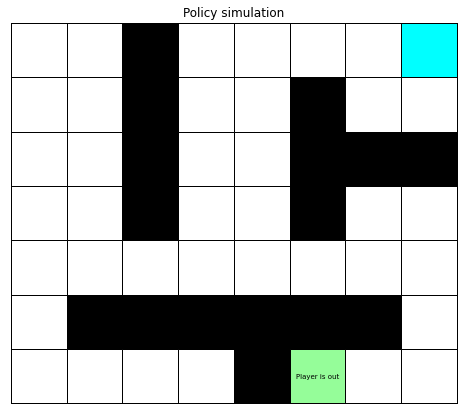

In [19]:
# Check that the new environment behaves as expected

# Infinite horizon
# Discount Factor 
gamma  = 49/50 # E[T] = 50 = 1/(1-gamma)
# Accuracy treshold 
epsilon = 0.0001;
V, policy = mz.value_iteration(env, gamma, epsilon)

# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0, 6,5, 0)
path, win = env.simulate(start, policy, method);

# Show the shortest path 
mz.animate_solution(maze, path)

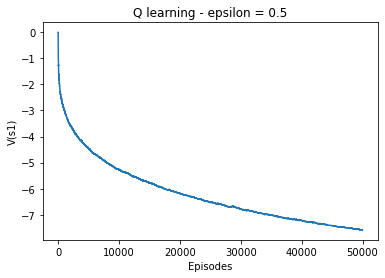

In [25]:
# Q learning - epsilon
ep = 0.5
_, policy, _, value_list = mz.q_learning(env, gamma=0.95, n_episodes=50000, T=0, epsilon= ep, player_state=(0,0,6,5,0), alpha_exponent=2/3)

# Plot
plt.ylabel('V(s1)')
plt.xlabel('Episodes')
plt.title('Q learning - epsilon = '+str(ep))
plt.plot(value_list)
plt.show()

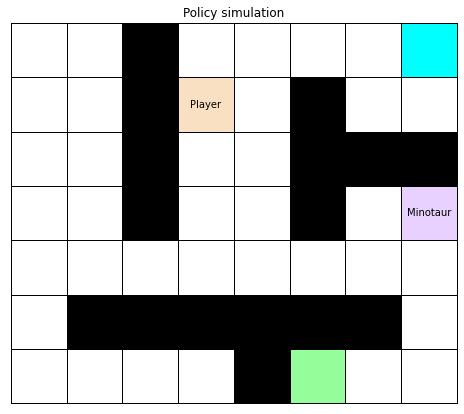

In [26]:
# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0, 6,5, 0)
path, win = env.simulate(start, policy, method);

# Show the shortest path 
mz.animate_solution(maze, path)

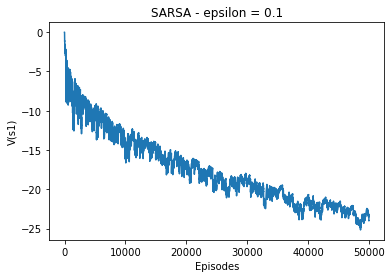

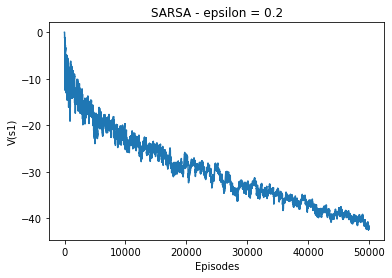

In [28]:
# SARSA with two different epsilon values

for ep in [0.1,0.2]:
    _, policy, _, value_list = mz.sarsa(env, gamma=49/50, n_episodes=50000, T=0, epsilon_in= ep, player_state=(0,0,6,5,0), alpha_exponent=2/3)


    # Plot
    plt.ylabel('V(s1)')
    plt.xlabel('Episodes')
    plt.title('SARSA - epsilon = '+str(ep))
    plt.plot(value_list)
    plt.show()


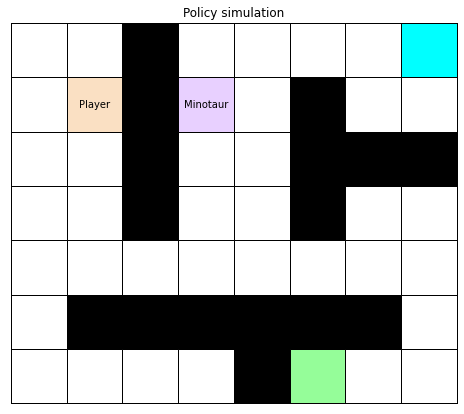

In [32]:
# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0, 6,5, 0)
path, win = env.simulate(start, policy, method);

# Show the shortest path 
mz.animate_solution(maze, path)

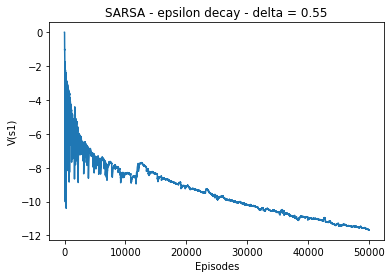

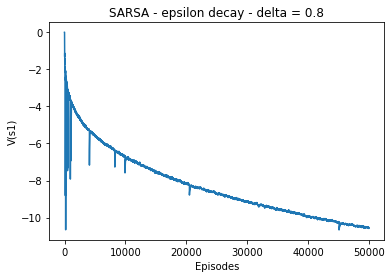

In [34]:
# SARSA with decaying epsilon according to a constant delta

for delta in [0.55,0.8]:
    _, policy, _, value_list = mz.sarsa(env, gamma=49/50, n_episodes=50000, T=0, epsilon_decay = True, delta = delta, player_state=(0,0,6,5,0), alpha_exponent=2/3)

    # Plot
    plt.ylabel('V(s1)')
    plt.xlabel('Episodes')
    plt.title('SARSA - epsilon decay - delta = '+str(delta))
    plt.plot(value_list)
    plt.show()

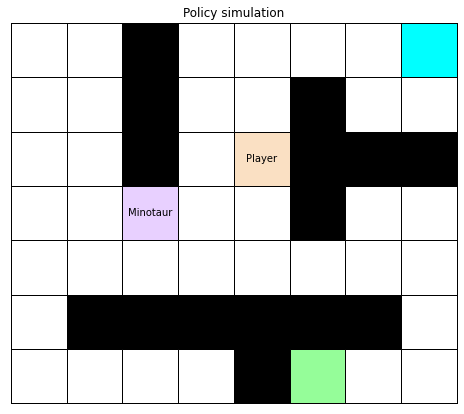

In [37]:
# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0, 6,5, 0)
path, win = env.simulate(start, policy, method);

# Show the shortest path 
mz.animate_solution(maze, path)